## Work
1. 請建立自己的deep neural network
2. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
3. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras
from keras.models import Model
from keras.datasets import cifar10
from keras import optimizers
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

2021-11-17 14:54:49.949247: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-17 14:54:49.949292: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
num_classes = 10

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:

# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))



In [5]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(x_train.shape[-1])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""
Compile 模型
"""
model = build_mlp()
model.summary()
optimizer = optimizers.gradient_descent_v2.SGD(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"],  optimizer=optimizer)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
dense (Dense)                (None, 512)               1573376   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


2021-11-17 14:55:48.507804: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-17 14:55:48.507842: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-17 14:55:48.507872: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (11402.pyspark3): /proc/driver/nvidia/version does not exist
2021-11-17 14:55:48.508165: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

2021-11-17 14:56:31.447490: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.
2021-11-17 14:56:31.626127: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/500
196/196 [==============================] - 3s 14ms/step - loss: 2.2572 - accuracy: 0.1595 - val_loss: 2.2143 - val_accuracy: 0.1910
Epoch 2/500
196/196 [==============================] - 3s 14ms/step - loss: 2.1858 - accuracy: 0.2096 - val_loss: 2.1589 - val_accuracy: 0.2242
Epoch 3/500
196/196 [==============================] - 3s 13ms/step - loss: 2.1363 - accuracy: 0.2332 - val_loss: 2.1150 - val_accuracy: 0.2461
Epoch 4/500
196/196 [==============================] - 3s 16ms/step - loss: 2.0956 - accuracy: 0.2520 - val_loss: 2.0782 - val_accuracy: 0.2555
Epoch 5/500
196/196 [==============================] - 2s 12ms/step - loss: 2.0604 - accuracy: 0.2654 - val_loss: 2.0456 - val_accuracy: 0.2744
Epoch 6/500
196/196 [==============================] - 2s 12ms/step - loss: 2.0294 - accuracy: 0.2793 - val_loss: 2.0164 - val_accuracy: 0.2813
Epoch 7/500
196/196 [==============================] - 2s 12ms/step - loss: 2.0017 - accuracy: 0.2904 - val_loss: 1.9909 - val_accuracy:

196/196 [==============================] - 2s 12ms/step - loss: 1.6575 - accuracy: 0.4235 - val_loss: 1.6642 - val_accuracy: 0.4162
Epoch 58/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6545 - accuracy: 0.4247 - val_loss: 1.6626 - val_accuracy: 0.4112
Epoch 59/500
196/196 [==============================] - 2s 11ms/step - loss: 1.6515 - accuracy: 0.4256 - val_loss: 1.6589 - val_accuracy: 0.4152
Epoch 60/500
196/196 [==============================] - 2s 11ms/step - loss: 1.6485 - accuracy: 0.4262 - val_loss: 1.6550 - val_accuracy: 0.4168
Epoch 61/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6455 - accuracy: 0.4281 - val_loss: 1.6536 - val_accuracy: 0.4214
Epoch 62/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6427 - accuracy: 0.4278 - val_loss: 1.6498 - val_accuracy: 0.4196
Epoch 63/500
196/196 [==============================] - 2s 12ms/step - loss: 1.6398 - accuracy: 0.4298 - val_loss: 1.6504 - val_accuracy: 0.417

196/196 [==============================] - 3s 17ms/step - loss: 1.5246 - accuracy: 0.4687 - val_loss: 1.5505 - val_accuracy: 0.4564
Epoch 114/500
196/196 [==============================] - 3s 17ms/step - loss: 1.5226 - accuracy: 0.4698 - val_loss: 1.5465 - val_accuracy: 0.4558
Epoch 115/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5209 - accuracy: 0.4698 - val_loss: 1.5449 - val_accuracy: 0.4568
Epoch 116/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5189 - accuracy: 0.4706 - val_loss: 1.5535 - val_accuracy: 0.4513
Epoch 117/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5174 - accuracy: 0.4711 - val_loss: 1.5446 - val_accuracy: 0.4557
Epoch 118/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5152 - accuracy: 0.4728 - val_loss: 1.5420 - val_accuracy: 0.4593
Epoch 119/500
196/196 [==============================] - 3s 16ms/step - loss: 1.5134 - accuracy: 0.4725 - val_loss: 1.5433 - val_accuracy:

196/196 [==============================] - 4s 20ms/step - loss: 1.4308 - accuracy: 0.4993 - val_loss: 1.4795 - val_accuracy: 0.4773
Epoch 170/500
196/196 [==============================] - 3s 18ms/step - loss: 1.4294 - accuracy: 0.5002 - val_loss: 1.4827 - val_accuracy: 0.4748
Epoch 171/500
196/196 [==============================] - 4s 19ms/step - loss: 1.4278 - accuracy: 0.5001 - val_loss: 1.4832 - val_accuracy: 0.4745
Epoch 172/500
196/196 [==============================] - 4s 18ms/step - loss: 1.4266 - accuracy: 0.5008 - val_loss: 1.4766 - val_accuracy: 0.4788
Epoch 173/500
196/196 [==============================] - 4s 19ms/step - loss: 1.4246 - accuracy: 0.5014 - val_loss: 1.4752 - val_accuracy: 0.4762
Epoch 174/500
196/196 [==============================] - 5s 24ms/step - loss: 1.4234 - accuracy: 0.5025 - val_loss: 1.4761 - val_accuracy: 0.4803
Epoch 175/500
196/196 [==============================] - 3s 17ms/step - loss: 1.4217 - accuracy: 0.5021 - val_loss: 1.4794 - val_accuracy:

196/196 [==============================] - 3s 17ms/step - loss: 1.3522 - accuracy: 0.5272 - val_loss: 1.4262 - val_accuracy: 0.4947
Epoch 226/500
196/196 [==============================] - 4s 18ms/step - loss: 1.3507 - accuracy: 0.5281 - val_loss: 1.4410 - val_accuracy: 0.4896
Epoch 227/500
196/196 [==============================] - 4s 22ms/step - loss: 1.3499 - accuracy: 0.5277 - val_loss: 1.4495 - val_accuracy: 0.4879
Epoch 228/500
196/196 [==============================] - 4s 20ms/step - loss: 1.3483 - accuracy: 0.5281 - val_loss: 1.4232 - val_accuracy: 0.5007
Epoch 229/500
196/196 [==============================] - 4s 18ms/step - loss: 1.3463 - accuracy: 0.5300 - val_loss: 1.4264 - val_accuracy: 0.4980
Epoch 230/500
196/196 [==============================] - 4s 19ms/step - loss: 1.3458 - accuracy: 0.5297 - val_loss: 1.4208 - val_accuracy: 0.4966
Epoch 231/500
196/196 [==============================] - 4s 18ms/step - loss: 1.3438 - accuracy: 0.5295 - val_loss: 1.4193 - val_accuracy:

196/196 [==============================] - 4s 22ms/step - loss: 1.2825 - accuracy: 0.5526 - val_loss: 1.4164 - val_accuracy: 0.4992
Epoch 282/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2812 - accuracy: 0.5520 - val_loss: 1.3964 - val_accuracy: 0.5035
Epoch 283/500
196/196 [==============================] - 4s 23ms/step - loss: 1.2802 - accuracy: 0.5524 - val_loss: 1.3913 - val_accuracy: 0.5025
Epoch 284/500
196/196 [==============================] - 4s 22ms/step - loss: 1.2790 - accuracy: 0.5533 - val_loss: 1.3857 - val_accuracy: 0.5041
Epoch 285/500
196/196 [==============================] - 5s 24ms/step - loss: 1.2779 - accuracy: 0.5535 - val_loss: 1.4208 - val_accuracy: 0.4909
Epoch 286/500
196/196 [==============================] - 4s 19ms/step - loss: 1.2761 - accuracy: 0.5537 - val_loss: 1.3849 - val_accuracy: 0.5109
Epoch 287/500
196/196 [==============================] - 4s 18ms/step - loss: 1.2757 - accuracy: 0.5548 - val_loss: 1.3956 - val_accuracy:

196/196 [==============================] - 4s 19ms/step - loss: 1.2185 - accuracy: 0.5744 - val_loss: 1.3619 - val_accuracy: 0.5226
Epoch 338/500
196/196 [==============================] - 4s 22ms/step - loss: 1.2175 - accuracy: 0.5751 - val_loss: 1.3694 - val_accuracy: 0.5198
Epoch 339/500
196/196 [==============================] - 3s 18ms/step - loss: 1.2163 - accuracy: 0.5754 - val_loss: 1.3711 - val_accuracy: 0.5164
Epoch 340/500
196/196 [==============================] - 4s 19ms/step - loss: 1.2142 - accuracy: 0.5756 - val_loss: 1.3702 - val_accuracy: 0.5164
Epoch 341/500
196/196 [==============================] - 4s 21ms/step - loss: 1.2137 - accuracy: 0.5756 - val_loss: 1.3631 - val_accuracy: 0.5158
Epoch 342/500
196/196 [==============================] - 3s 17ms/step - loss: 1.2132 - accuracy: 0.5769 - val_loss: 1.3748 - val_accuracy: 0.5036
Epoch 343/500
196/196 [==============================] - 4s 18ms/step - loss: 1.2122 - accuracy: 0.5767 - val_loss: 1.3647 - val_accuracy:

196/196 [==============================] - 4s 19ms/step - loss: 1.1569 - accuracy: 0.5965 - val_loss: 1.3585 - val_accuracy: 0.5145
Epoch 394/500
196/196 [==============================] - 3s 18ms/step - loss: 1.1581 - accuracy: 0.5970 - val_loss: 1.3584 - val_accuracy: 0.5168
Epoch 395/500
196/196 [==============================] - 3s 18ms/step - loss: 1.1567 - accuracy: 0.5965 - val_loss: 1.3581 - val_accuracy: 0.5204
Epoch 396/500
196/196 [==============================] - 3s 18ms/step - loss: 1.1534 - accuracy: 0.5977 - val_loss: 1.3643 - val_accuracy: 0.5192
Epoch 397/500
196/196 [==============================] - 4s 18ms/step - loss: 1.1540 - accuracy: 0.5981 - val_loss: 1.3888 - val_accuracy: 0.5129
Epoch 398/500
196/196 [==============================] - 4s 20ms/step - loss: 1.1539 - accuracy: 0.5958 - val_loss: 1.3490 - val_accuracy: 0.5228
Epoch 399/500
196/196 [==============================] - 4s 18ms/step - loss: 1.1522 - accuracy: 0.5991 - val_loss: 1.3598 - val_accuracy:

196/196 [==============================] - 3s 13ms/step - loss: 1.1008 - accuracy: 0.6160 - val_loss: 1.3367 - val_accuracy: 0.5262
Epoch 450/500
196/196 [==============================] - 3s 14ms/step - loss: 1.0994 - accuracy: 0.6163 - val_loss: 1.3494 - val_accuracy: 0.5199
Epoch 451/500
196/196 [==============================] - 3s 13ms/step - loss: 1.0977 - accuracy: 0.6172 - val_loss: 1.3310 - val_accuracy: 0.5264
Epoch 452/500
196/196 [==============================] - 3s 13ms/step - loss: 1.0981 - accuracy: 0.6173 - val_loss: 1.3460 - val_accuracy: 0.5196
Epoch 453/500
196/196 [==============================] - 3s 16ms/step - loss: 1.0955 - accuracy: 0.6181 - val_loss: 1.3470 - val_accuracy: 0.5202
Epoch 454/500
196/196 [==============================] - 3s 14ms/step - loss: 1.0956 - accuracy: 0.6176 - val_loss: 1.3526 - val_accuracy: 0.5260
Epoch 455/500
196/196 [==============================] - 2s 12ms/step - loss: 1.0940 - accuracy: 0.6175 - val_loss: 1.3360 - val_accuracy:

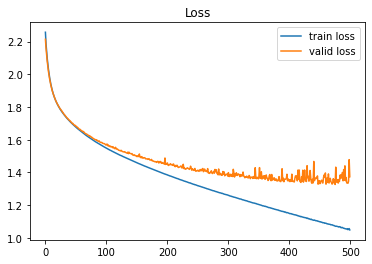

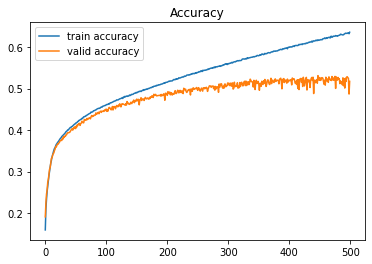

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()